In [1]:

import OHLC_data 
stock_name = "AAPL"
d1="2010-01-01"
d2="2025-01-01"
tf="1D"
ohlc_data = OHLC_data.get_records(stock_name,d1,d2,tf)
ohlc_data



[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.424604,6.439314,6.375672,6.407193,493729600
2010-01-05,6.435713,6.472038,6.401790,6.442318,601904800
2010-01-06,6.333345,6.461231,6.326741,6.435714,552160000
2010-01-07,6.321635,6.364264,6.275705,6.356759,477131200
2010-01-08,6.363664,6.364264,6.276006,6.313230,447610800
...,...,...,...,...,...
2024-12-24,257.286652,257.296596,254.386927,254.586231,23234700
2024-12-26,258.103729,259.179926,256.718662,257.276679,27237100


In [2]:
import pandas as pd
data=ohlc_data
data['Daily returns']=round(data['Close'].pct_change(),3)
data['Daily returns_%']=data['Daily returns']*100
data

Price,Close,High,Low,Open,Volume,Daily returns,Daily returns_%
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,,
2010-01-04,6.424604,6.439314,6.375672,6.407193,493729600,NaN,NaN
2010-01-05,6.435713,6.472038,6.401790,6.442318,601904800,0.002,0.2
2010-01-06,6.333345,6.461231,6.326741,6.435714,552160000,-0.016,-1.6
2010-01-07,6.321635,6.364264,6.275705,6.356759,477131200,-0.002,-0.2
2010-01-08,6.363664,6.364264,6.276006,6.313230,447610800,0.007,0.7
...,...,...,...,...,...,...,...
2024-12-24,257.286652,257.296596,254.386927,254.586231,23234700,0.011,1.1
2024-12-26,258.103729,259.179926,256.718662,257.276679,27237100,0.003,0.3


In [3]:
data["SMA_20"] = data["Close"].rolling(window=20).mean()

# Calculate 50-day Exponential Moving Average (EMA)
data["EMA_50"] = data["Close"].ewm(span=50, adjust=False).mean()


In [4]:
data

Price,Close,High,Low,Open,Volume,Daily returns,Daily returns_%,SMA_20,EMA_50
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,
Date,,,,,,,,,
2010-01-04,6.424604,6.439314,6.375672,6.407193,493729600,NaN,NaN,NaN,6.424604
2010-01-05,6.435713,6.472038,6.401790,6.442318,601904800,0.002,0.2,NaN,6.425040
2010-01-06,6.333345,6.461231,6.326741,6.435714,552160000,-0.016,-1.6,NaN,6.421444
2010-01-07,6.321635,6.364264,6.275705,6.356759,477131200,-0.002,-0.2,NaN,6.417530
2010-01-08,6.363664,6.364264,6.276006,6.313230,447610800,0.007,0.7,NaN,6.415418
...,...,...,...,...,...,...,...,...,...
2024-12-24,257.286652,257.296596,254.386927,254.586231,23234700,0.011,1.1,245.422269,237.462229
2024-12-26,258.103729,259.179926,256.718662,257.276679,27237100,0.003,0.3,246.616030,238.271699


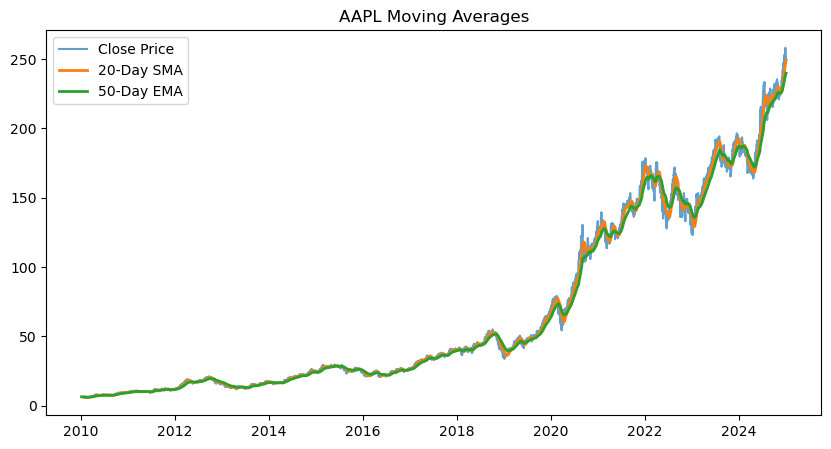

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(data["Close"], label="Close Price", alpha=0.7)
plt.plot(data["SMA_20"], label="20-Day SMA", linewidth=2)
plt.plot(data["EMA_50"], label="50-Day EMA", linewidth=2)
plt.title("AAPL Moving Averages")
plt.legend()
plt.show()


In [6]:

# Calculate daily change
delta = data['Close'].diff()

# Gains and losses
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)

# Period (usually 14)
window = 14

# Calculate average gain and loss
avg_gain = gain.rolling(window=window).mean()
avg_loss = loss.rolling(window=window).mean()

# Calculate RS and RSI
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))


In [7]:
data

Price,Close,High,Low,Open,Volume,Daily returns,Daily returns_%,SMA_20,EMA_50,RSI
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,
Date,,,,,,,,,,
2010-01-04,6.424604,6.439314,6.375672,6.407193,493729600,NaN,NaN,NaN,6.424604,NaN
2010-01-05,6.435713,6.472038,6.401790,6.442318,601904800,0.002,0.2,NaN,6.425040,NaN
2010-01-06,6.333345,6.461231,6.326741,6.435714,552160000,-0.016,-1.6,NaN,6.421444,NaN
2010-01-07,6.321635,6.364264,6.275705,6.356759,477131200,-0.002,-0.2,NaN,6.417530,NaN
2010-01-08,6.363664,6.364264,6.276006,6.313230,447610800,0.007,0.7,NaN,6.415418,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-12-24,257.286652,257.296596,254.386927,254.586231,23234700,0.011,1.1,245.422269,237.462229,76.180658
2024-12-26,258.103729,259.179926,256.718662,257.276679,27237100,0.003,0.3,246.616030,238.271699,76.812083


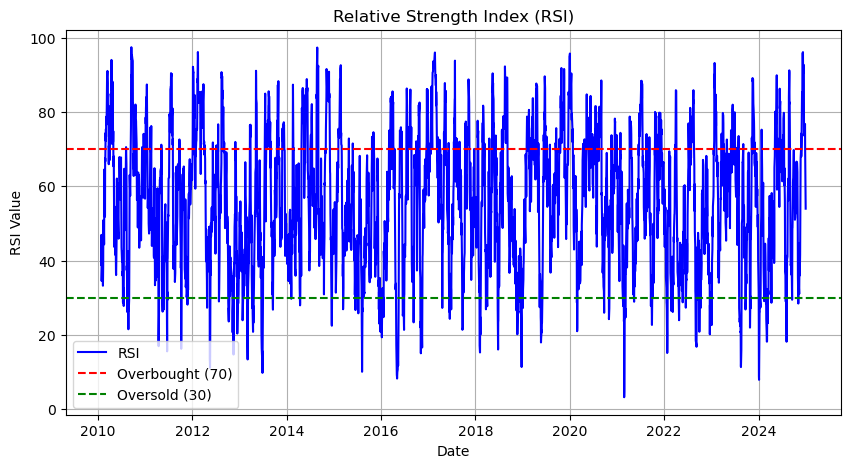

In [8]:
df=data
plt.figure(figsize=(10,5))
plt.plot(df.index, df['RSI'], label='RSI', color='blue')

# Add overbought / oversold levels
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')

plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
df=pd.DataFrame()
# Calculate EMAs
df['EMA12'] = data['Close'].ewm(span=12, adjust=False).mean()
df['EMA26'] = data['Close'].ewm(span=26, adjust=False).mean()

# MACD Line
df['MACD'] = df['EMA12'] - df['EMA26']

# Signal Line (9-day EMA of MACD)
df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

# Histogram
df['Histogram'] = df['MACD'] - df['Signal']
df

,EMA12,EMA26,MACD,Signal,Histogram
Date,,,,,
2010-01-04,6.424604,6.424604,0.000000,0.000000,0.000000
2010-01-05,6.426313,6.425427,0.000886,0.000177,0.000709
2010-01-06,6.412011,6.418606,-0.006596,-0.001177,-0.005418
2010-01-07,6.398107,6.411423,-0.013317,-0.003605,-0.009711
2010-01-08,6.392808,6.407886,-0.015078,-0.005900,-0.009178
...,...,...,...,...,...
2024-12-24,249.573696,243.521188,6.052509,5.377014,0.675494
2024-12-26,250.886009,244.601376,6.284633,5.558538,0.726095
2024-12-27,251.470603,245.348375,6.122227,5.671276,0.450951


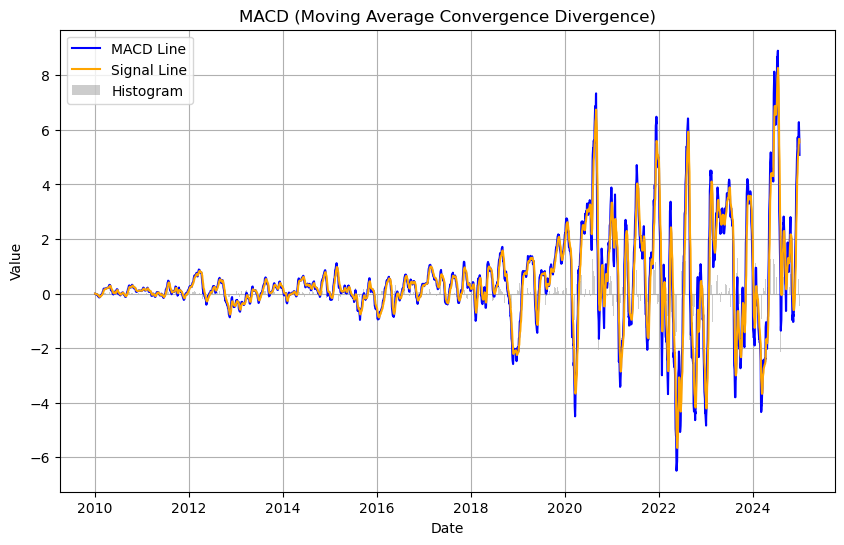

In [10]:
plt.figure(figsize=(10,6))

# MACD and Signal Lines
plt.plot(df.index, df['MACD'], label='MACD Line', color='blue')
plt.plot(df.index, df['Signal'], label='Signal Line', color='orange')

# Histogram (bars)
plt.bar(df.index, df['Histogram'], label='Histogram', color='gray', alpha=0.4)

plt.title('MACD (Moving Average Convergence Divergence)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [11]:

# ROC Calculation (period = 12)
period = 12
data['ROC'] = ((data['Close'] - data['Close'].shift(period)) / data['Close'].shift(period)) * 100
# Plot ROC



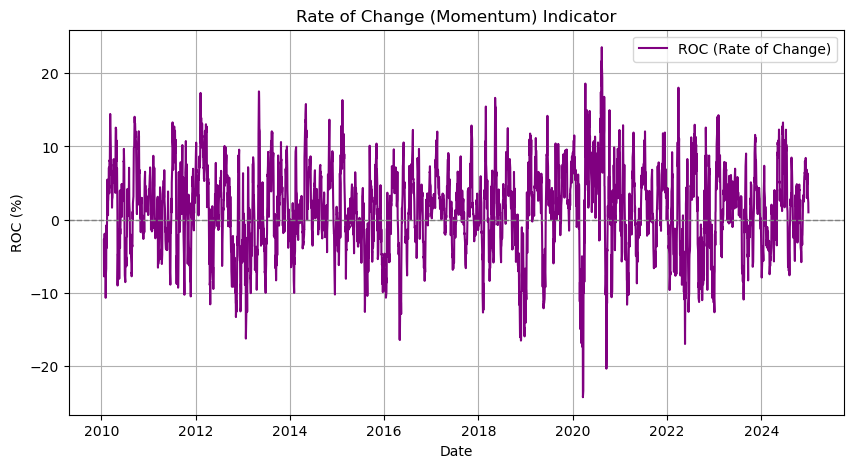

In [12]:
plt.figure(figsize=(10,5))
plt.plot(df.index, data['ROC'], label='ROC (Rate of Change)', color='purple')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

plt.title('Rate of Change (Momentum) Indicator')
plt.xlabel('Date')
plt.ylabel('ROC (%)')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
data

Price,Close,High,Low,Open,Volume,Daily returns,Daily returns_%,SMA_20,EMA_50,RSI,ROC
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,
Date,,,,,,,,,,,
2010-01-04,6.424604,6.439314,6.375672,6.407193,493729600,NaN,NaN,NaN,6.424604,NaN,NaN
2010-01-05,6.435713,6.472038,6.401790,6.442318,601904800,0.002,0.2,NaN,6.425040,NaN,NaN
2010-01-06,6.333345,6.461231,6.326741,6.435714,552160000,-0.016,-1.6,NaN,6.421444,NaN,NaN
2010-01-07,6.321635,6.364264,6.275705,6.356759,477131200,-0.002,-0.2,NaN,6.417530,NaN,NaN
2010-01-08,6.363664,6.364264,6.276006,6.313230,447610800,0.007,0.7,NaN,6.415418,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,257.286652,257.296596,254.386927,254.586231,23234700,0.011,1.1,245.422269,237.462229,76.180658,6.325151
2024-12-26,258.103729,259.179926,256.718662,257.276679,27237100,0.003,0.3,246.616030,238.271699,76.812083,4.972637


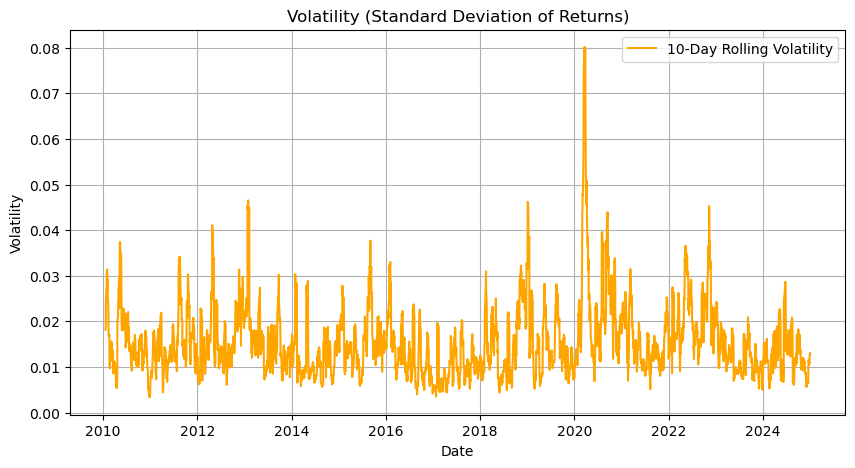

In [14]:
import numpy as np
# 2️⃣ Calculate rolling volatility (e.g., 10-day standard deviation)
data['Volatility'] = data['Daily returns'].rolling(window=10).std()

# Plot volatility
plt.figure(figsize=(10,5))
plt.plot(data.index, data['Volatility'], label='10-Day Rolling Volatility', color='orange')
plt.title('Volatility (Standard Deviation of Returns)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
import OHLC_data 
stock_name = ""
d1="2010-01-01"
d2="2025-01-01"
tf="1D"
crude_oil_data = OHLC_data.get_records("CL=F",d1,d2,tf)
gold_data = OHLC_data.get_records("GC=F",d1,d2,tf)
nifty_50_data = OHLC_data.get_records("^NSEI",d1,d2,tf)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [16]:
crude_oil_data.sample()

Price,Close,High,Low,Open,Volume
Ticker,CL=F,CL=F,CL=F,CL=F,CL=F
Date,,,,,
2013-10-24,97.110001,97.690002,95.949997,97.099998,248742


In [17]:
gold_data.sample()

Price,Close,High,Low,Open,Volume
Ticker,GC=F,GC=F,GC=F,GC=F,GC=F
Date,,,,,
2021-12-13,1786.300049,1787.099976,1783.800049,1784.400024,206


In [18]:
nifty_50_data.sample()

Price,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,
2015-03-24,8542.950195,8627.75,8535.849609,8537.049805,156700


In [19]:
macro = pd.DataFrame()
macro['Crude']=crude_oil_data['Close']
macro['Gold']=gold_data['Close']
macro['Nifty 50']=nifty_50_data['Close']

macro

,Crude,Gold,Nifty 50
Date,,,
2010-01-04,81.510002,1117.699951,5232.200195
2010-01-05,81.769997,1118.099976,5277.899902
2010-01-06,83.180000,1135.900024,5281.799805
2010-01-07,82.660004,1133.099976,5263.100098
2010-01-08,82.750000,1138.199951,5244.750000
...,...,...,...
2024-12-24,70.099998,2620.000000,23727.650391
2024-12-26,69.620003,2638.800049,23750.199219
2024-12-27,70.599998,2617.199951,23813.400391



## Added: Feature Scaling + Multi-Horizon Model Training


This section was appended automatically. It adds:
- StandardScaler-based feature scaling
- Creation of targets for multiple horizons (1 day, 7 days, 30 days, 365 days, 3650 days)
- Training a `RandomForestRegressor` for each horizon
- Evaluation (RMSE, R²) and plots of Actual vs Predicted

**Important:** The appended code expects a DataFrame named `df` already present in the notebook with a `Close` column (and ideally an index or column named `Date`). If your notebook uses a different variable name, replace `df` accordingly in the first code cell below.


In [20]:
data.isna().sum()

Price            Ticker
Close            AAPL       0
High             AAPL       0
Low              AAPL       0
Open             AAPL       0
Volume           AAPL       0
Daily returns               1
Daily returns_%             1
SMA_20                     19
EMA_50                      0
RSI                        14
ROC                        12
Volatility                 10
dtype: int64

In [21]:
data=data.fillna(0)

In [22]:
data.isna().sum()

Price            Ticker
Close            AAPL      0
High             AAPL      0
Low              AAPL      0
Open             AAPL      0
Volume           AAPL      0
Daily returns              0
Daily returns_%            0
SMA_20                     0
EMA_50                     0
RSI                        0
ROC                        0
Volatility                 0
dtype: int64

In [23]:
data["EMA12"]=df["EMA12"]
data["EMA26"]=df["EMA26"]
data["Signal"]=df["Signal"]
data["Histogran"]=df["Histogram"]
data["Crude"]=macro["Crude"]
data["Gold"]=macro["Gold"]
data["Nifty 50"]=macro["Nifty 50"]
final_df = data
final_df.sample()

Price,Close,High,Low,Open,Volume,Daily returns,Daily returns_%,SMA_20,EMA_50,RSI,ROC,Volatility,EMA12,EMA26,Signal,Histogran,Crude,Gold,Nifty 50
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,,,,,,,,,
Date,,,,,,,,,,,,,,,,,,,
2022-08-10,166.609985,166.708422,164.306338,165.074215,70170500,0.026,2.6,155.287257,150.615128,74.619168,10.804248,0.017372,159.74844,154.135248,4.859421,0.75377,91.93,1795.599976,17534.75


In [24]:
final_df.isna().sum()

Price            Ticker
Close            AAPL        0
High             AAPL        0
Low              AAPL        0
Open             AAPL        0
Volume           AAPL        0
Daily returns                0
Daily returns_%              0
SMA_20                       0
EMA_50                       0
RSI                          0
ROC                          0
Volatility                   0
EMA12                        0
EMA26                        0
Signal                       0
Histogran                    0
Crude                        2
Gold                         3
Nifty 50                   195
dtype: int64

In [25]:
df_clean = final_df.dropna()

In [26]:
df_clean.isna().sum()

Price            Ticker
Close            AAPL      0
High             AAPL      0
Low              AAPL      0
Open             AAPL      0
Volume           AAPL      0
Daily returns              0
Daily returns_%            0
SMA_20                     0
EMA_50                     0
RSI                        0
ROC                        0
Volatility                 0
EMA12                      0
EMA26                      0
Signal                     0
Histogran                  0
Crude                      0
Gold                       0
Nifty 50                   0
dtype: int64

In [29]:
final_df=df_clean

In [67]:
final_df.sample()

Price,Close,High,Low,Open,Volume,Daily returns,Daily returns_%,SMA_20,EMA_50,RSI,ROC,Volatility,EMA12,EMA26,Signal,Histogran,Crude,Gold,Nifty 50
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,,,,,,,,,
Date,,,,,,,,,,,,,,,,,,,
2013-10-18,15.708074,15.719494,15.609916,15.618559,290542000,0.009,0.9,15.121753,14.850872,77.320617,3.948417,0.00715,15.292829,15.098814,0.124258,0.069757,100.809998,1314.400024,6189.350098


## Model Creation

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# ===== 1. Prepare Data =====
data = final_df[['Close']].values

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)
# how many past days to look at
window = 30
X, y = [], []
for i in range(window, len(scaled_data)):
    X.append(scaled_data[i-window:i, 0])
    y.append(scaled_data[i, 0])
X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# ===== 2. Split into Train and Test =====
train_size = int(len(X) * 0.8)  # 80% train, 20% test
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# ===== 3. Build and Train Model =====
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)),
    LSTM(50),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)

# ===== 4. Make Predictions =====
y_pred = model.predict(X_test)



23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step 


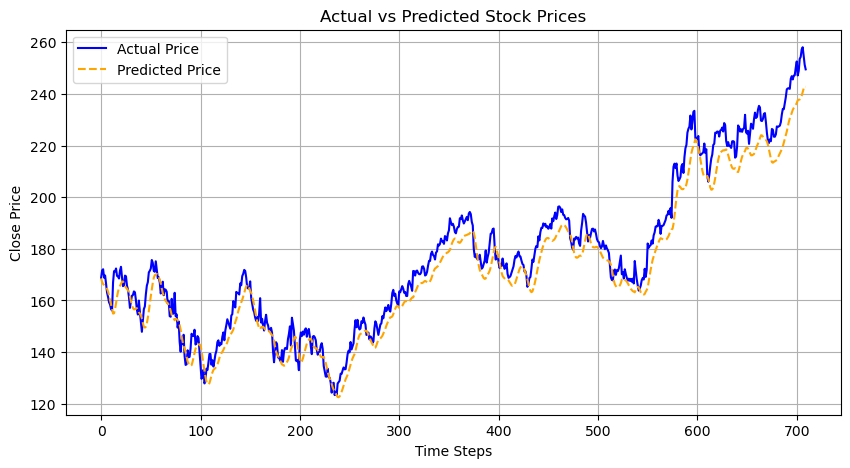

In [60]:
# inverse transform back to original prices
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_actual = scaler.inverse_transform(y_pred)

# ===== 5. Plot Actual vs Predicted =====
plt.figure(figsize=(10,5))
plt.plot(y_test_actual, label='Actual Price', color='blue')
plt.plot(y_pred_actual, label='Predicted Price', color='orange', linestyle='dashed')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time Steps')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [52]:
# ===== 3. Predict Future =====
def predict_future(n):
    n_days = n  # how many future days to predict
    last_window = scaled_data[-window:]
    predictions = []
    
    for _ in range(n_days):
        pred = model.predict(last_window.reshape(1, window, 1), verbose=0)
        predictions.append(pred[0,0])
        last_window = np.append(last_window[1:], pred[0,0])
        
    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1,1))
    
    # ===== 4. Show Result =====
    future_dates = pd.date_range(start=final_df.index[-1], periods=n_days+1, freq='D')[1:]
    pred_df = pd.DataFrame({'Date': future_dates, 'Predicted_Close': predictions.flatten()})
    print(pred_df)
    pred_df.to_excel("aapl.xlsx")
    return pred_df

In [55]:
predict_future(30)

         Date  Predicted_Close
0  2025-01-01       241.910980
1  2025-01-02       239.614609
2  2025-01-03       236.615479
3  2025-01-04       233.210007
4  2025-01-05       229.590500
5  2025-01-06       225.882980
6  2025-01-07       222.171677
7  2025-01-08       218.514725
8  2025-01-09       214.952042
9  2025-01-10       211.508774
10 2025-01-11       208.202164
11 2025-01-12       205.041901
12 2025-01-13       202.033875
13 2025-01-14       199.178055
14 2025-01-15       196.471344
15 2025-01-16       193.906250
16 2025-01-17       191.477295
17 2025-01-18       189.176743
18 2025-01-19       186.993484
19 2025-01-20       184.918777
20 2025-01-21       182.941437
21 2025-01-22       181.052750
22 2025-01-23       179.247696
23 2025-01-24       177.513412
24 2025-01-25       175.841248
25 2025-01-26       174.226974
26 2025-01-27       172.663208
27 2025-01-28       171.145676
28 2025-01-29       169.671539
29 2025-01-30       168.235901


,Date,Predicted_Close
0,2025-01-01,241.910980
1,2025-01-02,239.614609
2,2025-01-03,236.615479
3,2025-01-04,233.210007
4,2025-01-05,229.590500
5,2025-01-06,225.882980
6,2025-01-07,222.171677
7,2025-01-08,218.514725
8,2025-01-09,214.952042
9,2025-01-10,211.508774


In [46]:
def plot_future_graph(number_of_days):
    
    import matplotlib.pyplot as plt
    
    # Continue from your existing code...
    
    # ===== 5. Use the function =====
    n_days = number_of_days  # change this to however many future days you want
    pred_df = predict_future(n_days)
    
    # ===== 6. Combine actual + predicted for visualization =====
    # Combine last part of real data and future prediction
    recent_actual = final_df[['Close']].iloc[-60:].copy()
    recent_actual['Type'] = 'Actual'
    
    pred_plot = pred_df.copy()
    pred_plot['Type'] = 'Predicted'
    pred_plot = pred_plot.set_index('Date')
    
    # Combine both
    plot_df = pd.concat([
        recent_actual[['Close']].rename(columns={'Close': 'Price'}),
        pred_plot.rename(columns={'Predicted_Close': 'Price'})
    ])
    
    # ===== 7. Plot Results =====
    plt.figure(figsize=(10,5))
    for t, subset in plot_df.groupby('Type'):
        plt.plot(subset.index, subset['Price'], label=t)
    plt.title(f"Stock Price Prediction for Next {n_days} Days")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.show()
    


In [66]:
import pickle
with open('model1.pkl', 'wb') as f:
    pickle.dump({'model': model, 'scaler': scaler}, f)
print('done')

done


In [78]:
import pickle
with open('X_Test.pkl', 'wb') as f:
    pickle.dump(X_test, f)
print('done')

done
